We need to trim the ends of the spectral orders because they are noisy.

gully

March 22, 2016

In [1]:
import os

In [2]:
import json

In [3]:
!pwd

/Users/gully/GitHub/welter/notebooks


In [4]:
with open("../mf/exp01/s0_o10spec.json") as f:
    dat = json.load(f)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

(0, 1)

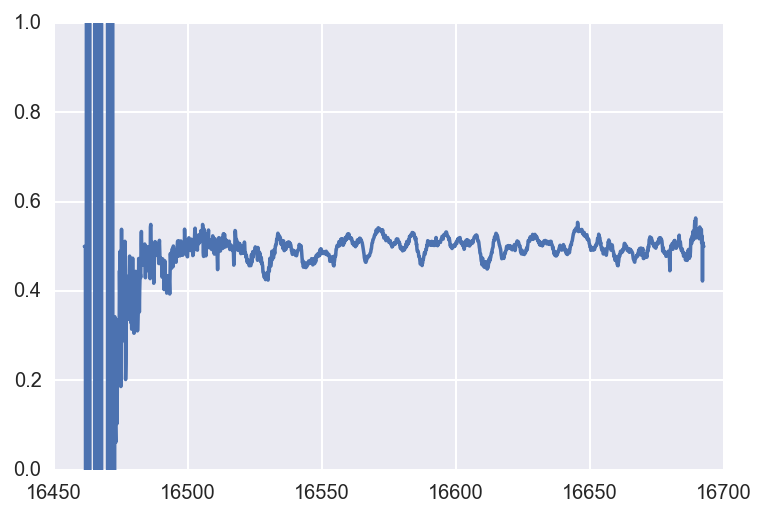

In [14]:
plt.plot(dat["wl"], dat["data"])
plt.ylim(0,1)

In [27]:
list(dat.keys())

['data',
 'sigma',
 'order',
 'resid',
 'spectrum_id',
 'model2',
 'wl',
 'model1',
 'model']

In [31]:
import numpy as np

In [30]:
plt.plot(np.array(dat["data"])/np.array(dat["sigma"]))

NameError: name 'np' is not defined

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


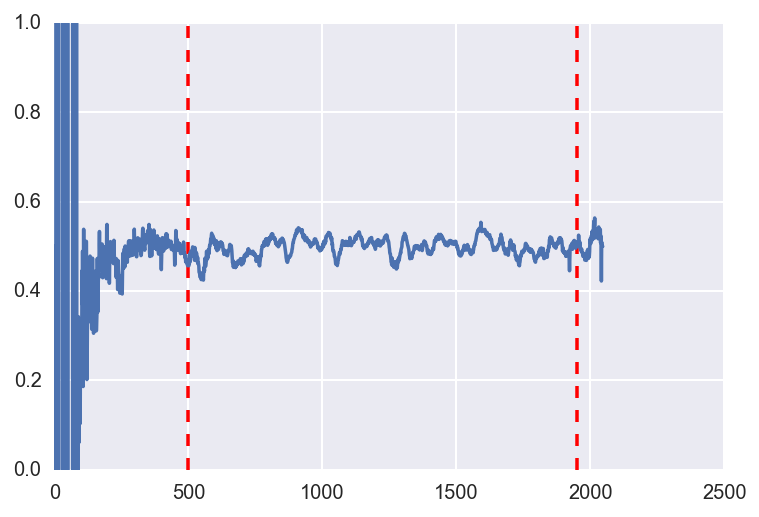

In [39]:
plt.plot(dat["data"])
plt.ylim(0,1)
plt.vlines(500, 0, 1, 'r', linestyles='--')
plt.vlines(1950, 0, 1, 'r', linestyles='--')

# HDF5

In [17]:
import h5py

In [18]:
f = h5py.File("../data/reduced/LkCa4_IGRINS_H.hdf5", 'r')

In [23]:
list(f.keys())

['fls', 'masks', 'sigmas', 'wls']

In [24]:
f2 = h5py.File("../data/reduced/LkCa4_IGRINS_H_clean.hdf5", 'w')

In [41]:
for key in f.keys():
    print(key)
    f2[key] = f[key][:, 500:1450]

fls
masks
sigmas
wls


In [48]:
d = f2["wls"]

In [49]:
d.shape

(28, 950)

In [51]:
list(f.attrs)

[]

In [52]:
f2.close()

# The end.